<a href="https://colab.research.google.com/github/jorgeerodriguez/FinOps_AWS/blob/main/TimeSeries_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
path = "/content/drive/MyDrive/GitHub/FinOps_AWS"
fnames = os.listdir(path)
for names in fnames:
  print(names)

FinOps copy.ipynb
Monthly_Cost_For_APR_2022.xlsx
Monthly_Cost_For_APR_2023.csv
Monthly_Cost_For_APR_2022.csv
Monthly_Cost_For_APR_2023.xlsx
Monthly_Cost_For_APR_2024.xlsx
Monthly_Cost_For_AUG_2022.csv
Monthly_Cost_For_APR_2024.csv
Monthly_Cost_For_AUG_2023.xlsx
Monthly_Cost_For_AUG_2022.xlsx
Monthly_Cost_For_AUG_2024.csv
Monthly_Cost_For_AUG_2023.csv
Monthly_Cost_For_DEC_2021.csv
Monthly_Cost_For_AUG_2024.xlsx
Monthly_Cost_For_DEC_2021.xlsx
Monthly_Cost_For_DEC_2022.csv
Monthly_Cost_For_DEC_2022.xlsx
Monthly_Cost_For_DEC_2023.csv
Monthly_Cost_For_DEC_2024.csv
Monthly_Cost_For_DEC_2023.xlsx
Monthly_Cost_For_FEB_2022.csv
Monthly_Cost_For_DEC_2024.xlsx
Monthly_Cost_For_FEB_2022.xlsx
Monthly_Cost_For_FEB_2024.csv
Monthly_Cost_For_FEB_2023.xlsx
Monthly_Cost_For_FEB_2023.csv
Monthly_Cost_For_FEB_2025.xlsx
Monthly_Cost_For_FEB_2024.xlsx
Monthly_Cost_For_JAN_2022.csv
Monthly_Cost_For_FEB_2025.csv
Monthly_Cost_For_JAN_2022.xlsx
Monthly_Cost_For_JAN_2023.csv
Monthly_Cost_For_JAN_2024.xlsx
Monthl

In [ ]:
#!pip install common.utils

In [ ]:
import datetime as dt
import os
import warnings
from collections import UserDict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from common.utils import load_data, mape
from IPython.display import Image
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [ ]:
f = path + ("/combined.csv")
combined_df = pd.read_csv(f)
df_dl_p =combined_df.copy()
df_dl_p['Date_str'] = df_dl_p['Year'].apply(lambda x: str(x)) + "-" + df_dl_p['Month No'].apply(lambda x: str(x)) + "-01"
df_dl_p['Date'] = pd.to_datetime(df_dl_p['Date_str'])
df_dl_p.set_index('Date')
df_dl_p.index = pd.to_datetime(df_dl_p.index)
df_dl_p = df_dl_p.groupby(['Date']).agg(Cost=('Cost','sum'))

In [ ]:
df_dl_p

,Cost
Date,
2021-10-01,3.794357e+05
2021-11-01,4.499119e+05
2021-12-01,4.646831e+05
2022-01-01,4.806844e+05
2022-02-01,4.958688e+05
2022-03-01,5.622309e+05
2022-04-01,6.468500e+05
2022-05-01,1.344622e+06
2022-06-01,7.066702e+05


In [ ]:
pd.options.display.float_format = "{:,.2f}".format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

In [ ]:
ts_data_load = df_dl_p.copy()
ts_data_load.head()

,Cost
Date,
2021-10-01,"379,435.68"
2021-11-01,"449,911.87"
2021-12-01,"464,683.13"
2022-01-01,"480,684.44"
2022-02-01,"495,868.77"


In [ ]:
valid_st_data_load = "2023-01-01 00:00:00" # Y-M-D
test_st_data_load = "2024-01-01 00:00:00"

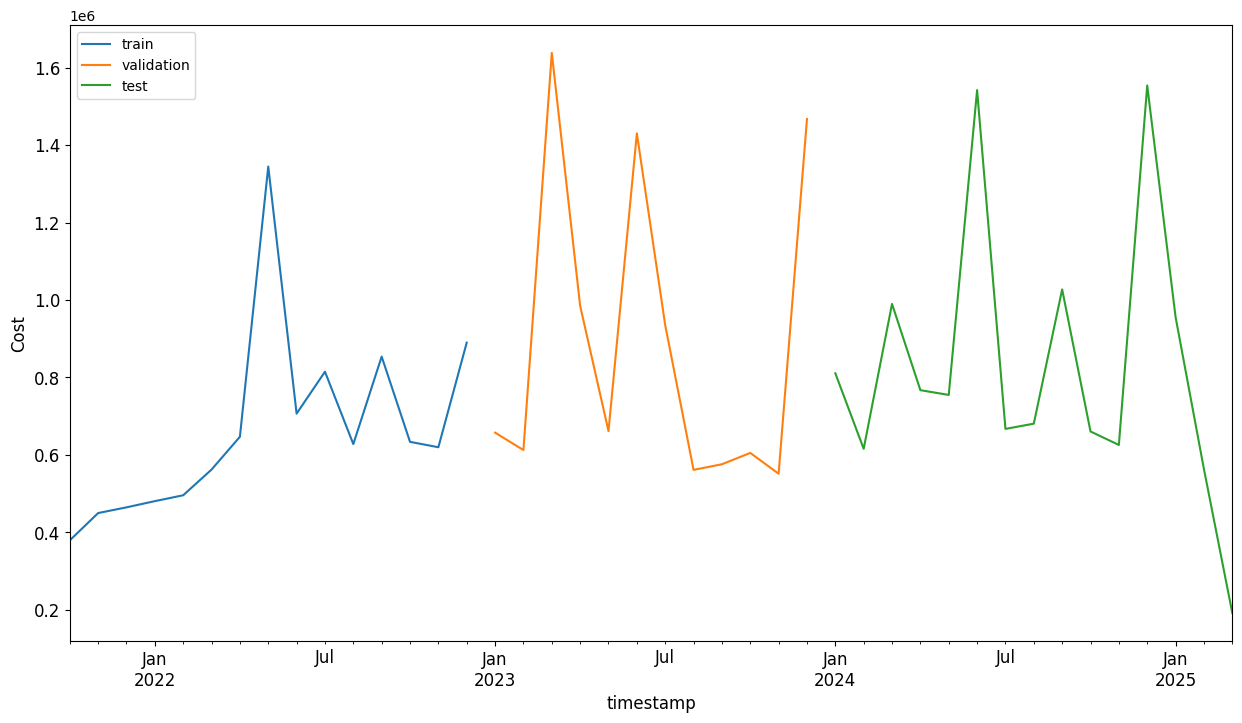

In [ ]:
ts_data_load[ts_data_load.index < valid_st_data_load][["Cost"]].rename(columns={"Cost": "train"}).join(
    ts_data_load[(ts_data_load.index >= valid_st_data_load) & (ts_data_load.index < test_st_data_load)][
        ["Cost"]
    ].rename(columns={"Cost": "validation"}),
    how="outer",
).join(
    ts_data_load[test_st_data_load:][["Cost"]].rename(columns={"Cost": "test"}), how="outer"
).plot(
    y=["train", "validation", "test"], figsize=(15, 8), fontsize=12
)
plt.xlabel("timestamp", fontsize=12)
plt.ylabel("Cost", fontsize=12)
plt.show()

In [ ]:
T = 6
HORIZON = 1
train = ts_data_load.copy()[ts_data_load.index < valid_st_data_load][["Cost"]]

scaler = MinMaxScaler()
train["Cost"] = scaler.fit_transform(train)

train_shifted = train.copy()
train_shifted["y_t+1"] = train_shifted["Cost"].shift(-1)
for t in range(1, T + 1):
    train_shifted[str(T - t)] = train_shifted["Cost"].shift(T - t)
y_col = "y_t+1"
X_cols = ["Cost_t-5", "Cost_t-4", "Cost_t-3", "Cost_t-2", "Cost_t-1", "Cost_t"]
train_shifted.columns = ["Cost_original"] + [y_col] + X_cols

train_shifted = train_shifted.dropna(how="any")
train_shifted.head()

,Cost_original,y_t+1,Cost_t-5,Cost_t-4,Cost_t-3,Cost_t-2,Cost_t-1,Cost_t
Date,,,,,,,,
2022-03-01,0.19,0.28,0.00,0.07,0.09,0.10,0.12,0.19
2022-04-01,0.28,1.00,0.07,0.09,0.10,0.12,0.19,0.28
2022-05-01,1.00,0.34,0.09,0.10,0.12,0.19,0.28,1.00
2022-06-01,0.34,0.45,0.10,0.12,0.19,0.28,1.00,0.34
2022-07-01,0.45,0.26,0.12,0.19,0.28,1.00,0.34,0.45


In [ ]:
y_train = train_shifted[y_col].to_numpy()
X_train = train_shifted[X_cols].to_numpy()

In [ ]:
T

6

In [ ]:
X_train = X_train.reshape(X_train.shape[0], T, 1)

In [ ]:
y_train.shape

(9,)

In [ ]:
y_train[:3]

array([0.28, 1.  , 0.34])

In [ ]:
X_train.shape

(9, 6, 1)

In [ ]:
train_shifted.head(3)

,Cost_original,y_t+1,Cost_t-5,Cost_t-4,Cost_t-3,Cost_t-2,Cost_t-1,Cost_t
Date,,,,,,,,
2022-03-01,0.19,0.28,0.00,0.07,0.09,0.10,0.12,0.19
2022-04-01,0.28,1.00,0.07,0.09,0.10,0.12,0.19,0.28
2022-05-01,1.00,0.34,0.09,0.10,0.12,0.19,0.28,1.00


In [ ]:
#look_back_dt = dt.datetime.strptime(valid_st_data_load, "%Y-%m-%d %H:%M:%S") - dt.timedelta(
#    hours=T - 1
#)
#valid = ts_data_load.copy()[(ts_data_load.index >= look_back_dt) & (ts_data_load.index < test_st_data_load)][
#    ["Cost"]
#]

valid = ts_data_load[(ts_data_load.index >= valid_st_data_load) & (ts_data_load.index < test_st_data_load)][
        ["Cost"]
    ]

valid["Cost"] = scaler.transform(valid)

valid_shifted = valid.copy()
valid_shifted["y+1"] = valid_shifted["Cost"].shift(-1)
for t in range(1, T + 1):
    valid_shifted["Cost_t-" + str(T - t)] = valid_shifted["Cost"].shift(T - t)

valid_shifted = valid_shifted.dropna(how="any")
valid_shifted.head()

,Cost,y+1,Cost_t-5,Cost_t-4,Cost_t-3,Cost_t-2,Cost_t-1,Cost_t-0
Date,,,,,,,,
2023-06-01,1.09,0.58,0.29,0.24,1.30,0.63,0.29,1.09
2023-07-01,0.58,0.19,0.24,1.30,0.63,0.29,1.09,0.58
2023-08-01,0.19,0.20,1.30,0.63,0.29,1.09,0.58,0.19
2023-09-01,0.20,0.23,0.63,0.29,1.09,0.58,0.19,0.20
2023-10-01,0.23,0.18,0.29,1.09,0.58,0.19,0.20,0.23


In [ ]:
y_valid = valid_shifted["y+1"].to_numpy()
X_valid = valid_shifted[["Cost_t-" + str(T - t) for t in range(1, T + 1)]].to_numpy()
X_valid = X_valid.reshape(X_valid.shape[0], T, 1)

In [ ]:
y_valid.shape

(6,)

In [ ]:
y_valid[:3]

array([0.58, 0.19, 0.2 ])

In [ ]:
X_valid.shape

(6, 6, 1)

In [ ]:
X_valid[:3]

array([[[0.29],
        [0.24],
        [1.3 ],
        [0.63],
        [0.29],
        [1.09]],

       [[0.24],
        [1.3 ],
        [0.63],
        [0.29],
        [1.09],
        [0.58]],

       [[1.3 ],
        [0.63],
        [0.29],
        [1.09],
        [0.58],
        [0.19]]])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.models import Model, Sequential

In [ ]:
LATENT_DIM = 5
BATCH_SIZE = 32
EPOCHS = (
    200
)

In [ ]:
model = Sequential()
model.add(GRU(LATENT_DIM, input_shape=(T, 1)))
model.add(Dense(HORIZON))

In [ ]:
model.compile(optimizer="RMSprop", loss="mse")

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                          │ (None, 5)                   │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126 (504.00 B)

 Trainable params: 126 (504.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
earlystop = EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

In [ ]:
model_history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_valid, y_valid),
    callbacks=[earlystop],
    verbose=1,
)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2700 - val_loss: 0.3304
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.2525 - val_loss: 0.3171
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.2406 - val_loss: 0.3066
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.2310 - val_loss: 0.2976
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.2229 - val_loss: 0.2896
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.2157 - val_loss: 0.2824
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.2092 - val_loss: 0.2758
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.2031 - val_loss: 0.2697
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.1975 - val_loss: 0.2639
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.1923 - val_loss: 0.2585
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.1873 - val_loss: 0.2534
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.1826 - 

In [ ]:
look_back_dt = dt.datetime.strptime(test_st_data_load, "%Y-%m-%d %H:%M:%S") - dt.timedelta(
    hours=T - 1
)

test = ts_data_load.copy()[test_st_data_load:][["Cost"]]

test["Cost"] = scaler.transform(test)

test_shifted = test.copy()
test_shifted["y_t+1"] = test_shifted["Cost"].shift(-1)
for t in range(1, T + 1):
    test_shifted["Cost_t-" + str(T - t)] = test_shifted["Cost"].shift(T - t)

test_shifted = test_shifted.dropna(how="any")

y_test = test_shifted["y_t+1"].to_numpy()
X_test = test_shifted[["Cost_t-" + str(T - t) for t in range(1, T + 1)]].to_numpy()
X_test = X_test.reshape(X_test.shape[0], T, 1)

In [ ]:
test_shifted

,Cost,y_t+1,Cost_t-5,Cost_t-4,Cost_t-3,Cost_t-2,Cost_t-1,Cost_t-0
Date,,,,,,,,
2024-06-01,1.20,0.30,0.45,0.24,0.63,0.40,0.39,1.20
2024-07-01,0.30,0.31,0.24,0.63,0.40,0.39,1.20,0.30
2024-08-01,0.31,0.67,0.63,0.40,0.39,1.20,0.30,0.31
2024-09-01,0.67,0.29,0.40,0.39,1.20,0.30,0.31,0.67
2024-10-01,0.29,0.26,0.39,1.20,0.30,0.31,0.67,0.29
2024-11-01,0.26,1.22,1.20,0.30,0.31,0.67,0.29,0.26
2024-12-01,1.22,0.60,0.30,0.31,0.67,0.29,0.26,1.22
2025-01-01,0.60,0.19,0.31,0.67,0.29,0.26,1.22,0.60
2025-02-01,0.19,-0.19,0.67,0.29,0.26,1.22,0.60,0.19


In [ ]:
y_test

array([ 0.3 ,  0.31,  0.67,  0.29,  0.26,  1.22,  0.6 ,  0.19, -0.19])

In [ ]:
X_test.shape

(9, 6, 1)

In [ ]:
ts_predictions = model.predict(X_test)
ts_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


array([[0.32],
       [0.34],
       [0.35],
       [0.35],
       [0.37],
       [0.39],
       [0.34],
       [0.33],
       [0.34]], dtype=float32)

In [ ]:
ev_ts_data = pd.DataFrame(
    ts_predictions, columns=["t+" + str(t) for t in range(1, HORIZON + 1)]
)
ev_ts_data["timestamp"] = test_shifted.index
ev_ts_data = pd.melt(ev_ts_data, id_vars="timestamp", value_name="prediction", var_name="h")
ev_ts_data["actual"] = np.transpose(y_test).ravel()
ev_ts_data[["prediction", "actual"]] = scaler.inverse_transform(
    ev_ts_data[["prediction", "actual"]]
)
ev_ts_data.head()

,timestamp,h,prediction,actual
0,2024-06-01,t+1,"687,991.86","667,258.51"
1,2024-07-01,t+1,"705,340.64","680,725.63"
2,2024-08-01,t+1,"717,964.36","1,027,314.59"
3,2024-09-01,t+1,"714,975.12","660,593.27"
4,2024-10-01,t+1,"732,995.42","625,740.62"


In [ ]:
def mape(ts_predictions, actuals):
    """Mean absolute percentage error"""
    return ((ts_predictions - actuals).abs() / actuals).mean()

In [ ]:
mape(ev_ts_data["prediction"], ev_ts_data["actual"])

0.4820590227204996

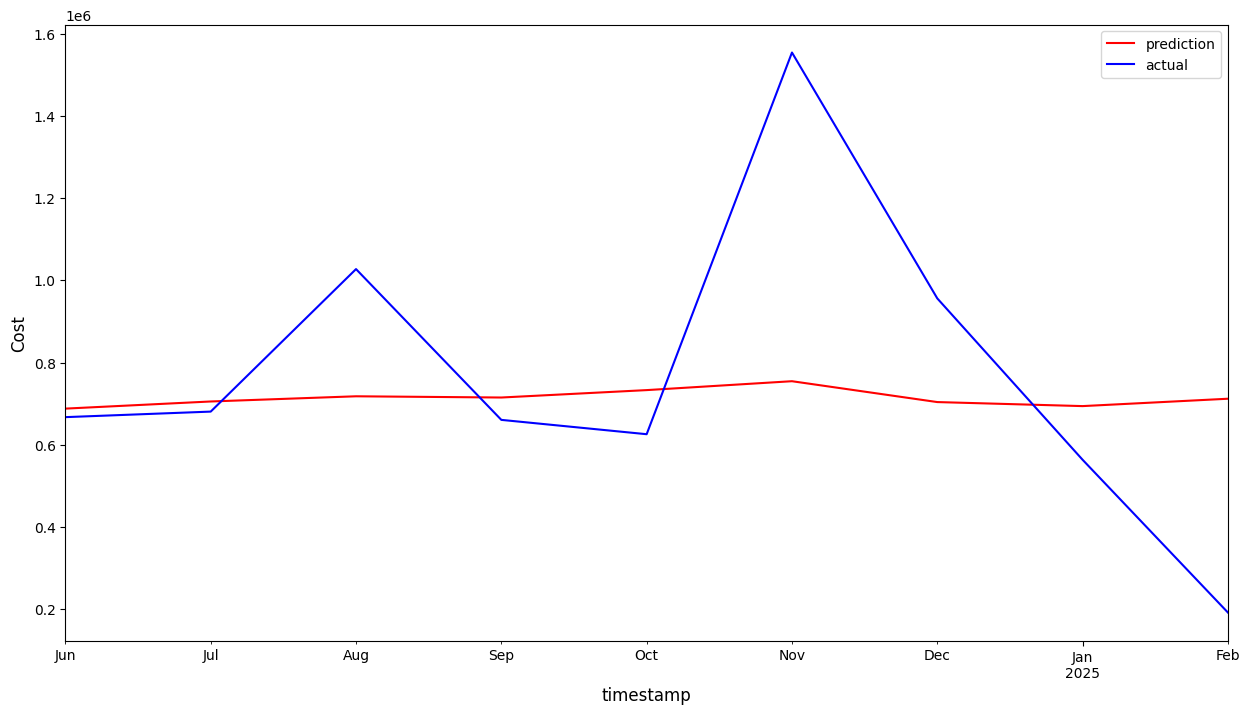

In [ ]:
ev_ts_data[ev_ts_data.timestamp < "2026-01-01"].plot(
    x="timestamp", y=["prediction", "actual"], style=["r", "b"], figsize=(15, 8)
)
plt.xlabel("timestamp", fontsize=12)
plt.ylabel("Cost", fontsize=12)
plt.show()

# Time Series Forcasting Using Deep Learning with PyTorch


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#import yfinance as yf

In [6]:
# combined_df = pd.read_csv("combined.csv")
f = path + ("/combined.csv")
combined_df = pd.read_csv(f)
df_dl_p =combined_df.copy()
df_dl_p['Date_str'] = df_dl_p['Year'].apply(lambda x: str(x)) + "-" + df_dl_p['Month No'].apply(lambda x: str(x)) + "-01"
df_dl_p['Date'] = pd.to_datetime(df_dl_p['Date_str'])
df_dl_p.set_index('Date')
df_dl_p.index = pd.to_datetime(df_dl_p.index)
df_dl_p = df_dl_p.groupby(['Date']).agg(Cost=('Cost','sum'))

In [ ]:
df_dl_p['Cost'].values

array([ 379435.67704427,  449911.87305182,  464683.13071651,
        480684.44135087,  495868.77473876,  562230.92500196,
        646850.02135427, 1344621.56086104,  706670.17392832,
        814895.03279678,  628009.11863612,  853861.65869291,
        633772.29234042,  619883.30722919,  889948.35091571,
        657555.14626922,  612616.3813554 , 1637977.72372277,
        984951.61981491,  661406.91502436, 1430313.2300025 ,
        935199.45099872,  561431.97407874,  575917.79240299,
        605203.31990461,  551499.40967322, 1467498.89985757,
        810804.83440277,  615822.80797646,  989912.92161552,
        767211.23927792,  754922.17987719, 1542013.75306699,
        667258.5063381 ,  680725.63096972, 1027314.58650558,
        660593.27243416,  625740.61553184, 1554001.93531605,
        956054.6327542 ,  563596.49421164,  192086.96314473])

In [31]:
#cost = df_dl_p['Cost'].values.tolist()
x = np.array(df_dl_p['Cost'].values)
np.concatenate((x, x, x, x), axis=0)
cost = np.concatenate((x, x, x, x, x, x, x, x, x, x), axis=0).tolist()
print(len(cost))
train , test = cost[:len(cost)-12], cost[len(cost)-12:]
print(len(train), len(test))
model = ExponentialSmoothing(train, seasonal='mul', seasonal_periods=12).fit()
pred = model.forecast(14)
for x in range(len(pred)):
  if x < len(test):
    print('predicted=%f, expected=%f' % (pred[x], test[x]))
  else:
    print('predicted=%f,' % (pred[x]))





420
408 12
predicted=693766.222948, expected=767211.239278
predicted=827099.749479, expected=754922.179877
predicted=1210830.897496, expected=1542013.753067
predicted=845415.655880, expected=667258.506338
predicted=647089.813269, expected=680725.630970
predicted=914088.214092, expected=1027314.586506
predicted=737590.535933, expected=660593.272434
predicted=850151.944696, expected=625740.615532
predicted=1151980.033936, expected=1554001.935316
predicted=791069.174883, expected=956054.632754
predicted=641162.361835, expected=563596.494212
predicted=867019.417761, expected=192086.963145
predicted=693766.222948,
predicted=827099.749479,


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


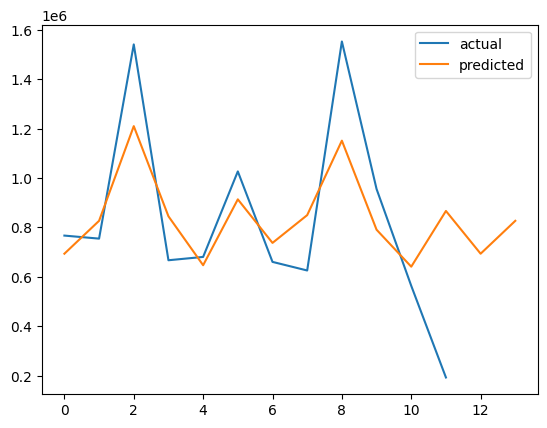

In [32]:
plt.plot(test, label='actual')
plt.plot(pred, label='predicted')
plt.legend()

In [33]:
import torch


In [34]:
def get_function(x1_val = 0, x2_val = 0, x3_val = 0, x4_val = 0):
  # variables
  x1 = torch.tensor(x1_val, requires_grad=True, dtype=torch.float32)
  x2 = torch.tensor(x2_val, requires_grad=True, dtype=torch.float32)
  x3 = torch.tensor(x3_val, requires_grad=True, dtype=torch.float32)
  x4 = torch.tensor(x4_val, requires_grad=True, dtype=torch.float32)

  # function
  p1 = x1.pow(3)
  m1 = p1 * x2
  m2 = x3 * x4
  f = m1 + m2
  vars = {'x1':x1, 'x2':x2, 'x3':x3, 'x4':x4}
  return f, vars


In [35]:
if __name__ == '__main__':
  f, vars = get_function(x1_val = 2, x2_val = 4, x3_val = 3, x4_val = 5)
  print(f.item())

47.0


In [38]:
#! pip install torchviz

In [39]:
from torchviz import make_dot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



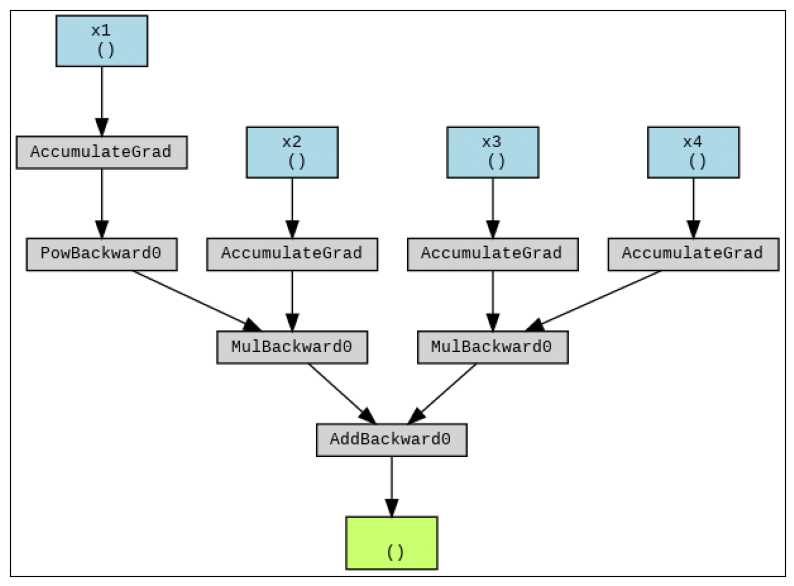

In [40]:
f, params = get_function(x1_val = 2, x2_val = 4, x3_val = 3, x4_val = 5)
make_dot(f, params=params).render("function", format="png")
img = mpimg.imread('function.png')
plt.figure(figsize=(10,10))
plt.xticks([])
plt.yticks([])
imgplot = plt.imshow(img)
plt.show()


In [41]:
from torch.autograd import grad


In [42]:
f, params = get_function(x1_val = 2, x2_val = 4, x3_val = 3, x4_val = 5)
df_dx1 = grad(f, params['x1'])
#df_dx2 = grad(f, params['x2'])
print(df_dx1)
#print(df_dx2)


(tensor(48.),)


In [43]:
f, params = get_function(x1_val = 2, x2_val = 4, x3_val = 3, x4_val = 5)
df_dx = grad(outputs=f, inputs=params.values())
print(df_dx)



(tensor(48.), tensor(8.), tensor(5.), tensor(3.))


In [44]:
import torch

In [45]:
x = torch.tensor(data=[1, 2, 3])
print(x)


tensor([1, 2, 3])


In [46]:
#ts = np.concatenate(np.array(df_dl_p['Cost'].values), np.array(df_dl_p['Cost'].values))

x = np.array(df_dl_p['Cost'].values)
np.concatenate((x, x), axis=0)

array([ 379435.67704427,  449911.87305182,  464683.13071651,
        480684.44135087,  495868.77473876,  562230.92500196,
        646850.02135427, 1344621.56086104,  706670.17392832,
        814895.03279678,  628009.11863612,  853861.65869291,
        633772.29234042,  619883.30722919,  889948.35091571,
        657555.14626922,  612616.3813554 , 1637977.72372277,
        984951.61981491,  661406.91502436, 1430313.2300025 ,
        935199.45099872,  561431.97407874,  575917.79240299,
        605203.31990461,  551499.40967322, 1467498.89985757,
        810804.83440277,  615822.80797646,  989912.92161552,
        767211.23927792,  754922.17987719, 1542013.75306699,
        667258.5063381 ,  680725.63096972, 1027314.58650558,
        660593.27243416,  625740.61553184, 1554001.93531605,
        956054.6327542 ,  563596.49421164,  192086.96314473,
        379435.67704427,  449911.87305182,  464683.13071651,
        480684.44135087,  495868.77473876,  562230.92500196,
        646850.02135427,

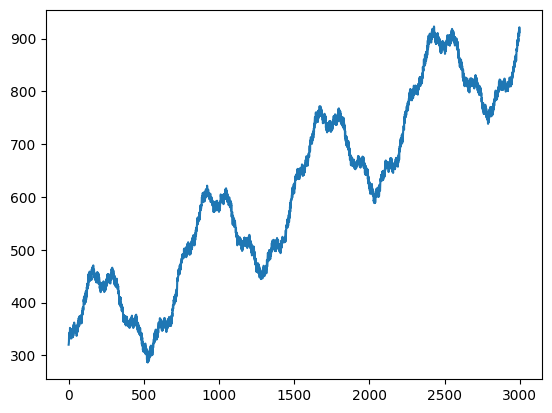

<class 'list'>


In [55]:
import random
from math import sin, cos
import matplotlib.pyplot as plt
import numpy as np


def get_time_series_data(length):
    a = .2
    b = 300
    c = 20
    ls = 5
    ms = 20
    gs = 100

    ts = []


    for i in range(length):
        ts.append(b + a * i + ls * sin(i / 5) + ms * cos(i / 24) + gs * sin(i / 120) + c * random.random())
        x = np.array(df_dl_p['Cost'].values)
        ts1 = np.concatenate((x, x), axis=0).tolist()

    #x = np.array(df_dl_p['Cost'].values)
    #np.concatenate((x, x, x, x), axis=0)
    #cost = np.concatenate((x, x, x, x, x, x, x, x, x, x), axis=0).tolist()
    #return cost

    return ts


if __name__ == '__main__':
    data = get_time_series_data(3_000)
    plt.plot(data)
    plt.show()
    print(type(data))

In [48]:
import torch

#from ch2.nn.time_series import get_time_series_data
from sklearn.model_selection import train_test_split


def get_time_series_datasets(features, ts_len):
    ts = get_time_series_data(ts_len)

    X = []
    Y = []
    for i in range(features + 1, ts_len):
        X.append(ts[i - (features + 1):i - 1])
        Y.append([ts[i]])

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, shuffle = False)
    X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size = 0.5, shuffle = False)

    x_train = torch.tensor(data = X_train)
    y_train = torch.tensor(data = Y_train)

    x_val = torch.tensor(data = X_val)
    y_val = torch.tensor(data = Y_val)

    x_test = torch.tensor(data = X_test)
    y_test = torch.tensor(data = Y_test)

    return x_train, x_val, x_test, y_train, y_val, y_test

In [49]:
import torch
import torch.nn.functional as F

class FCNN(torch.nn.Module):

    def __init__(self, n_inp, l_1, l_2, n_out):
        super(FCNN, self).__init__()
        self.lin1 = torch.nn.Linear(n_inp, l_1)
        self.lin2 = torch.nn.Linear(l_1, l_2)
        self.lin3 = torch.nn.Linear(l_2, n_out)

    def forward(self, x):
        x1 = F.relu(self.lin1(x))
        x2 = F.relu(self.lin2(x1))
        y = self.lin3(x2)
        return y


In [50]:
class DummyPredictor(torch.nn.Module):

    def forward(self, x):
        last_values = []
        for r in x.tolist():
            last_values.append([r[-1]])
        return torch.tensor(data = last_values)

In [51]:
from scipy import interpolate
import torch
import numpy as np


class InterpolationPredictor(torch.nn.Module):

    def forward(self, x):
        last_values = []
        values = x.tolist()
        for v in values:
            x = np.arange(0, len(v))
            y = interpolate.interp1d(x, v, fill_value = 'extrapolate')
            last_values.append([y(len(v)).tolist()])
        return torch.tensor(data = last_values)

In [52]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


class HwesPredictor(torch.nn.Module):

    def forward(self, x):
        last_values = []
        for r in x.tolist():
            model = ExponentialSmoothing(r)
            results = model.fit()
            forecast = results.forecast()
            last_values.append([forecast[0]])
        return torch.tensor(data = last_values)

epoch 0: train - 287261.5938, val: - 468011.875
epoch 1000: train - 150.4284, val: - 147.0814
epoch 2000: train - 42.3346, val: - 42.962
epoch 3000: train - 37.5835, val: - 39.7368
epoch 4000: train - 90.1774, val: - 64.3164
epoch 5000: train - 35.3276, val: - 37.874
epoch 6000: train - 34.9432, val: - 37.9551
epoch 7000: train - 35.0035, val: - 38.2557
epoch 8000: train - 34.6798, val: - 37.9475
epoch 9000: train - 35.4872, val: - 73.7568
Testing
FCNN Loss: 38.194984436035156
Dummy Loss: 75.77690887451172
Linear Interpolation Loss: 220.05862426757812
HWES Loss: 59.23703127724627


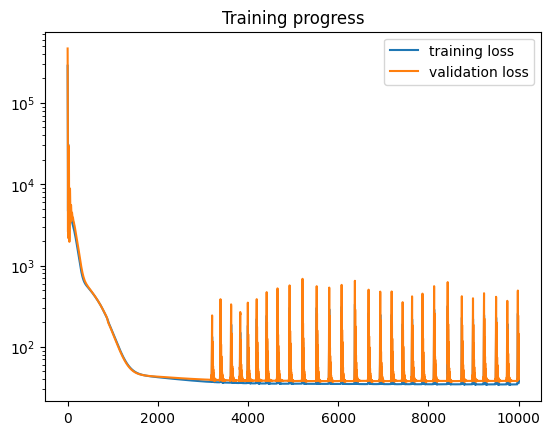

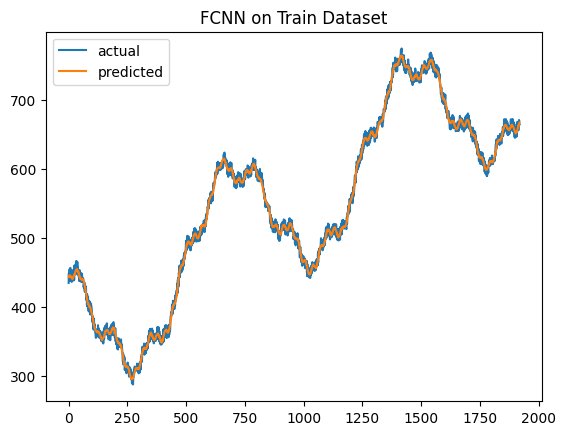

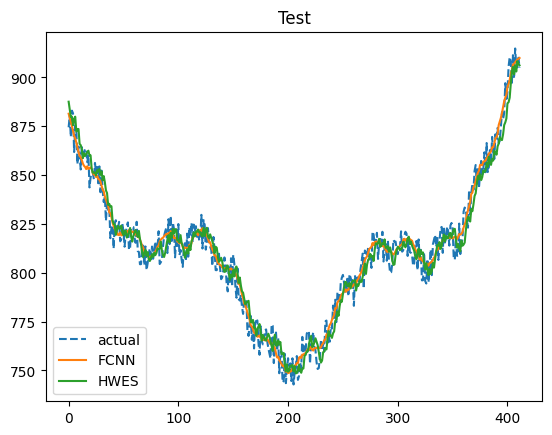

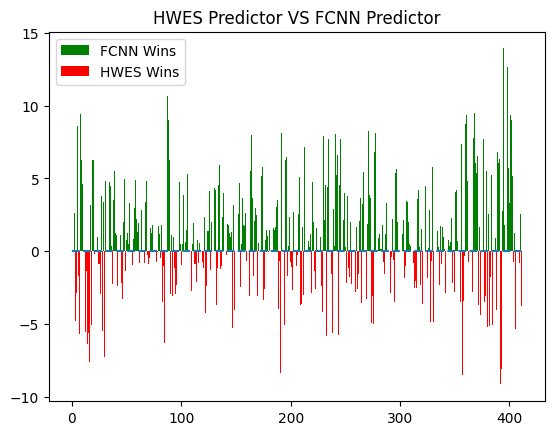

In [56]:
import copy
import random

import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt

#from ch2.nn.dataset import get_time_series_datasets
#from ch2.nn.dummy_model import DummyPredictor
#from ch2.nn.fcnn_model import FCNN
#from ch2.nn.hwes_model import HwesPredictor
#from ch2.nn.linear_interpolation_model import InterpolationPredictor

random.seed(1)
torch.manual_seed(1)

features = 256
ts_len = 3_000


#features = 8 # when using my data, I need to set this to 8, as the data has only 8 features
#ts_len = 42 # when using my data, I need to set this to 42, as the data has only 42 rows


x_train, x_val, x_test, y_train, y_val, y_test = get_time_series_datasets(features, ts_len)

net = FCNN(n_inp = features, l_1 = 64, l_2 = 32, n_out = 1)
net.train()
dummy_predictor = DummyPredictor()
interpolation_predictor = InterpolationPredictor()
hwes_predictor = HwesPredictor()

optimizer = torch.optim.Adam(params = net.parameters())
loss_func = torch.nn.MSELoss()

best_model = None
min_val_loss = 1_000_000

training_loss = []
validation_loss = []

for t in range(10_000):

    prediction = net(x_train)
    loss = loss_func(prediction, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    val_prediction = net(x_val)
    val_loss = loss_func(val_prediction, y_val)

    training_loss.append(loss.item())
    validation_loss.append(val_loss.item())

    if val_loss.item() < min_val_loss:
        best_model = copy.deepcopy(net)
        min_val_loss = val_loss.item()

    if t % 1000 == 0:
        print(f'epoch {t}: train - {round(loss.item(), 4)}, val: - {round(val_loss.item(), 4)}')

net.eval()

print('Testing')
print(f'FCNN Loss: {loss_func(best_model(x_test), y_test).item()}')
print(f'Dummy Loss: {loss_func(dummy_predictor(x_test), y_test).item()}')
print(f'Linear Interpolation Loss: {loss_func(interpolation_predictor(x_test), y_test).item()}')
print(f'HWES Loss: {loss_func(hwes_predictor(x_test), y_test).item()}')

plt.title("Training progress")
plt.yscale("log")
plt.plot(training_loss, label = 'training loss')
plt.plot(validation_loss, label = 'validation loss')
plt.legend()
plt.show()

plt.title("FCNN on Train Dataset")
plt.plot(y_train, label = 'actual')
plt.plot(best_model(x_train).tolist(), label = 'predicted')
plt.legend()
plt.show()

plt.title('Test')
plt.plot(y_test, '--', label = 'actual')
plt.plot(best_model(x_test).tolist(), label = 'FCNN')
plt.plot(hwes_predictor(x_test).tolist(), label = 'HWES')
plt.legend()
plt.show()

test_n = len(y_test)
net_abs_dev = (best_model(x_test) - y_test).abs_()
hwes_abs_dev = (hwes_predictor(x_test) - y_test).abs_()
diff_pos = F.relu(hwes_abs_dev - net_abs_dev).reshape(test_n).tolist()
diff_min = (-F.relu(net_abs_dev - hwes_abs_dev)).reshape(test_n).tolist()
plt.title('HWES Predictor VS FCNN Predictor')
plt.hlines(0, xmin = 0, xmax = test_n, linestyles = 'dashed')
plt.bar(list(range(test_n)), diff_pos, color = 'g', label = 'FCNN Wins')
plt.bar(list(range(test_n)), diff_min, color = 'r', label = 'HWES Wins')
plt.legend()
plt.show()
